In [1]:
#   RUNME.setup
#  This helps set up your kernal's environment in order to avoid errors
import os

import numpy as np
from matplotlib import pyplot as plt

from canopyhydro.Cylinder import Cylinder
from canopyhydro.CylinderCollection import CylinderCollection
from canopyhydro.Forester import Forester

# Determines where configuration file is located
# file contains directory info and model input settings
config_file = os.environ[
    "CANOPYHYDRO_CONFIG"
] = f"{os.getcwd()}/canopyhydro_config.toml"
log_config = os.environ["CANOPYHYDRO_LOG_CONFIG"] = f"{os.getcwd()}/logging_config.yml"

### Cylinder

The Cylinder class is used to represent the 3-D cylinders that make up a QSM

2024.10.14 18:34:09.892 |MainThread   | INFO    | geometry.py:617 -    draw_cylinders_3D() | model - Plotting cylinder in 3D

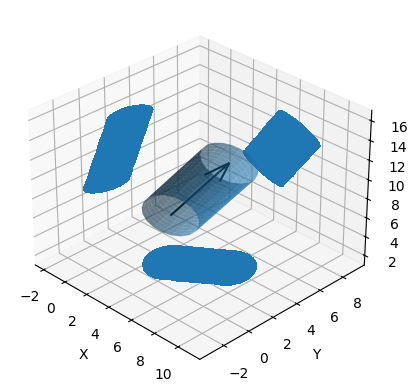

In [9]:
# A trivial example of a Cylinder object


myCyl = Cylinder(
    cyl_id=1.0,
    x=[3, 6],
    y=[2, 4],
    z=[6, 12],
    radius=2.0,
    length=0.064433,
    branch_order=0.0,
    branch_id=0.0,
    volume=0.010021,
    parent_id=0.0,
    reverse_branch_order=32.0,
    segment_id=0.0,
)

fig = myCyl.draw_3D(show=True, draw_vectors=True, draw_projections=True)

The most important function of Cylinder objects is their ability to return data regarding the projections onto planes. Cylinder objects utilize our custom 'geometry' module to calculate their projections onto the XY, XZ and YZ planes.

In [10]:
# Projecting a cylinder onto the XY plane
import numpy as np

from canopyhydro.Cylinder import Cylinder
from canopyhydro.CylinderCollection import CylinderCollection

cyl = Cylinder(
    1, np.array([0, 1]), np.array([0, 1]), np.array([0, 1]), 1, 1, 0, 0, 1, 0, 0, 0
)
cyl.get_projection("XY")
print(cyl.projected_data["XY"]["polygon"])
print(cyl.projected_data["XY"]["base_vector"])
print(cyl.projected_data["XY"]["anti_vector"])
print(cyl.projected_data["XY"]["angle"])
print(cyl.projected_data["XY"]["area"])

POLYGON ((0.7055547485197222 -0.7086486608663443, 0.6927794439882502 -0.7206122246452861, 0.6793868045462438 -0.7318989317552199, 0.6654090505126061 -0.7424887326410364, 0.6508814456329607 -0.7523657839197849, 0.6358418765269868 -0.761518538618793, 0.6203303971002122 -0.7699397615971714, 0.6043887500439113 -0.777626472292711, 0.5880598778050475 -0.7845798192275877, 0.5713874351273125 -0.7908048926864933, 0.5544153144933113 -0.7963104835647774, 0.5371871946141021 -0.8011087975191887, 0.5197461206122052 -0.8052151342206525, 0.5021341228348492 -0.8086475417192888, 0.4843918794234269 -0.8114264557256392, 0.4665584259537658 -0.8135743330482637, 0.4486709137372394 -0.8151152875793871, 0.4307644168049181 -0.8160747361660723, 0.4128717862361091 -0.81647906052316, 0.3950235493693495 -0.8163552901089949, 0.3772478505606316 -0.8157308096593167, 0.3595704295270235 -0.8146330939104094, 0.3420146329184335 -0.813089470978599, 0.3246014545714764 -0.811126914925819, 0.3073495998873245 -0.80877186724500

The main use of this functionality is shown below. Namely, projecting cylinders allows us to more readily provide visualizations of the tree canopy they represent

2024.10.14 18:34:10.432 |MainThread   | INFO    | geometry.py:617 -    draw_cylinders_3D() | model - Plotting cylinder in 3D

'myCyl' as seen from above
The 'XY' projection of myCyl as an area of 25.19 cm^3
       and the cylinder makes an angle of 1.03 radians with the XY plane
The 'XZ' projection of myCyl as an area of 30.42 cm^3
       and the cylinder makes an angle of 0.29 radians with the XZ plane
The 'YZ' projection of myCyl as an area of 30.68 cm^3
       and the cylinder makes an angle of 0.44 radians with the YZ plane


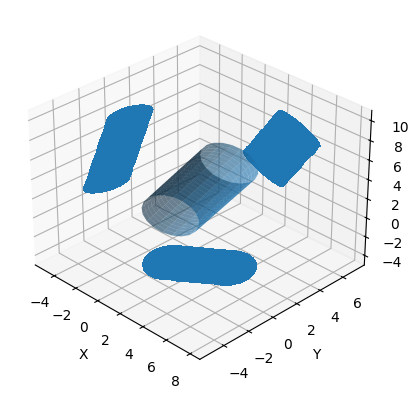

In [11]:
# Here we show the 3D view and the 3 possible 2D projections of a Cylinder object
myCyl = Cylinder(
    cyl_id=1.0,
    x=[0, 3],
    y=[0, 2],
    z=[0, 6],
    radius=2.0,
    length=0.064433,
    branch_order=0.0,
    branch_id=0.0,
    volume=0.010021,
    parent_id=0.0,
    reverse_branch_order=32.0,
    segment_id=0.0,
)


fig = myCyl.draw_3D(show=False, draw_projections=True)

myCyl.get_projection("XY")
print("'myCyl' as seen from above")
print(
    f"The 'XY' projection of myCyl as an area of {round(myCyl.projected_data['XY']['area'],2)} cm^3"
)
print(
    f"       and the cylinder makes an angle of {round(myCyl.projected_data['XY']['angle'],2)} radians with the XY plane"
)

myCyl.get_projection("XZ")
print(
    f"The 'XZ' projection of myCyl as an area of {round(myCyl.projected_data['XZ']['area'],2)} cm^3"
)
print(
    f"       and the cylinder makes an angle of {round(myCyl.projected_data['XZ']['angle'],2)} radians with the XZ plane"
)

myCyl.get_projection("YZ")
print(
    f"The 'YZ' projection of myCyl as an area of {round(myCyl.projected_data['YZ']['area'],2)} cm^3"
)
print(
    f"       and the cylinder makes an angle of {round(myCyl.projected_data['YZ']['angle'],2)} radians with the YZ plane"
)

In the above 3D representations, the entire surface of cylinder must be calculated, s this may be computationally intensive. \
As such, the 'get_projection' function calculates statistics regarding 2D projections directly instead.

'myCyl' as seen from above


2024.10.14 18:34:11.021 |MainThread   | INFO    | geometry.py:563 -            draw_cyls() | model - Plotting cylinder collection

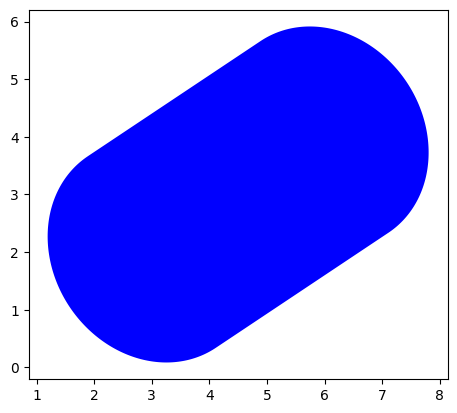

'myCyl' as seen from the 'fromt' of the tree


2024.10.14 18:34:11.303 |MainThread   | INFO    | geometry.py:563 -            draw_cyls() | model - Plotting cylinder collection

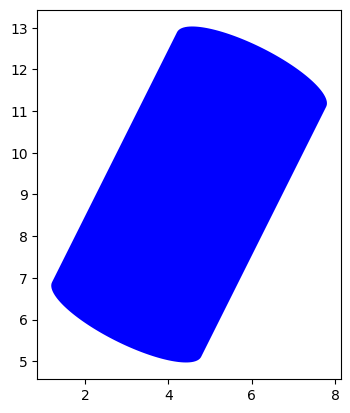

'myCyl' as seen from one 'side' of the tree


2024.10.14 18:34:11.581 |MainThread   | INFO    | geometry.py:563 -            draw_cyls() | model - Plotting cylinder collection

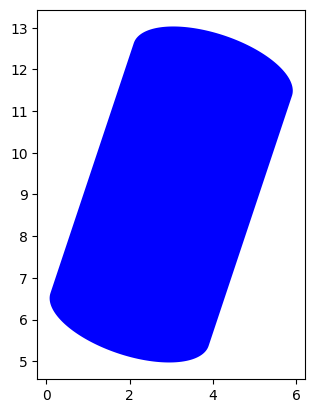

In [12]:
# The get_projection function allows for the retrieval of
# projection data without the need to define the entire surface of the cylinder


myCyl = Cylinder(
    cyl_id=1.0,
    x=[3, 6],
    y=[2, 4],
    z=[6, 12],
    radius=2.0,
    length=0.064433,
    branch_order=0.0,
    branch_id=0.0,
    volume=0.010021,
    parent_id=0.0,
    reverse_branch_order=32.0,
    segment_id=0.0,
)

print("'myCyl' as seen from above")
myCyl.get_projection("XY")
myCyl.draw(plane="XY")
plt.show()

print("'myCyl' as seen from the 'fromt' of the tree")
myCyl.get_projection("XZ")
myCyl.draw(plane="XZ")
plt.show()

print("'myCyl' as seen from one 'side' of the tree")
myCyl.get_projection("YZ")
myCyl.draw(plane="YZ")
plt.show()

For more information regarding these 2D projections, see [Projecting Cylinders](projecting_cylinders.ipynb)

### Cylinder Collection

Cylinder Collections are just as they sound and, at the most basic level, a Cylinder Collection is defined as a list of 1 or more Cylinder objects. \
Cylinder Collections almost always represent QSM's (or parts of a QSM), and are meant to help users explore their QSMs. \
Below, we demonstrate how one might initialize a cylinder collection using cylinder data (e.g. QSM data) stored in a CSV file.

In [13]:
# Example showing the most basic possible cylinder Collection4
myCollection = CylinderCollection()
# The below file is one of our several testing files, featuring only
# the trunk of a tree and one of its branches
myCollection.from_csv("5_SmallTree.csv")

2024.10.14 18:34:11.877 |MainThread   | INFO    | CylinderCollection.py:295 -             from_csv() | model - Processing <_io.TextIOWrapper name='./data/input/5_SmallTree.csv' mode='r' encoding='UTF-8'>

{'cyl_id': 1, 'parent_id': 2, 'x': [3, 6], 'y': [4, 7], 'z': [5, 8], 'radius': 9, 'volume': 10, 'length': 12, 'segment_id': 15, 'branch_order': 20, 'reverse_branch_order': 21, 'branch_id': 24}
{'cyl_id': 1, 'parent_id': 2, 'x': [3, 6], 'y': [4, 7], 'z': [5, 8], 'radius': 9, 'volume': 10, 'length': 12, 'segment_id': 15, 'branch_order': 20, 'reverse_branch_order': 21, 'branch_id': 24}
{'cyl_id': 1, 'parent_id': 2, 'x': [3, 6], 'y': [4, 7], 'z': [5, 8], 'radius': 9, 'volume': 10, 'length': 12, 'segment_id': 15, 'branch_order': 20, 'reverse_branch_order': 21, 'branch_id': 24}
{'cyl_id': 1, 'parent_id': 2, 'x': [3, 6], 'y': [4, 7], 'z': [5, 8], 'radius': 9, 'volume': 10, 'length': 12, 'segment_id': 15, 'branch_order': 20, 'reverse_branch_order': 21, 'branch_id': 24}
{'cyl_id': 1, 'parent_id': 2, 'x': [3, 6], 'y': [4, 7], 'z': [5, 8], 'radius': 9, 'volume': 10, 'length': 12, 'segment_id': 15, 'branch_order': 20, 'reverse_branch_order': 21, 'branch_id': 24}
{'cyl_id': 1, 'parent_id': 2, 'x': 

2024.10.14 18:34:11.958 |MainThread   | INFO    | CylinderCollection.py:323 -             from_csv() | model - ./data/input/5_SmallTree.csv initialized with 517 cylinders

2024.10.14 18:34:11.966 |MainThread   | INFO    | CylinderCollection.py:338 -    project_cylinders() | model - Projection into XY axis begun for file 5_SmallTree.csv

2024.10.14 18:34:14.668 |MainThread   | INFO    | CylinderCollection.py:347 -    project_cylinders() | model - Projection into XY axis complete for file 5_SmallTree.csv

2024.10.14 18:34:14.671 |MainThread   | WARNING | CylinderCollection.py:497 -        get_end_nodes() | model - Graph not initialized, running initialize_graph_from with default values

2024.10.14 18:34:15.260 |MainThread   | INFO    | CylinderCollection.py:774 - find_flow_components() | model - 5_SmallTree.csv found to have 70 drip components

reached_End of find flows


2024.10.14 18:34:15.269 |MainThread   | INFO    | CylinderCollection.py:845 -      calculate_flows() | model - np flow chars [Flow(num_cylinders=216.0, projected_area=16.51706021532694, surface_area=19.495074988550606, angle_sum=180.03288665020426, volume=3.9062960000000007, sa_to_vol=83646.49652248439, drip_node_id=0.0, drip_node_loc=(-0.299115, 2.537844, -0.598273)), None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None]

2024.10.14 18:34:15.274 |MainThread   | INFO    | CylinderCollection.py:846 -      calculate_flows() | model -  flow chars []

2024.10.14 18:34:15.277 |MainThread   | INFO    | CylinderCollection.py:848 -      calculate_flows() | model -  togetha [Flow(num_cylinders=216.0, projected_area=16.51706021532694, surface_area=19.495074988550606, angle_sum=180.03288665020426, volume=3.9062960000000007, sa_to_vol=83646.49652248439, drip_node_id=0.0, drip_node_loc=(-0.299115, 2.537844, -0.598273))]

2024.10.14 18:34:15.454 |MainThread   | INFO    | CylinderCollection.py:1003 -           statistics() | model - Found hull alpha shape stats

2024.10.14 18:34:15.914 |MainThread   | INFO    | CylinderCollection.py:1023 -           statistics() | model - found projected areas

2024.10.14 18:34:16.689 |MainThread   | INFO    | utils.py:150 -            save_file() | model - [['total_psa', 'psa_w_overlap', 'stem_psa', 'stem_psa_w_overlap', 'tot_surface_area', 'stem_surface_area', 'tot_hull_area', 'tot_hull_boundary', 'stem_hull_area', 'stem_hull_boundary', 'num_drip_points', 'max_bo', 'topQuarterTotPsa', 'topHalfTotPsa', 'topThreeQuarterTotPsa', 'TotalShade', 'top_quarter_shade', 'top_half_shade', 'top_three_quarter_shade', 'DBH', 'volume', 'X_max', 'Y_max', 'Z_max', 'X_min', 'Y_min', 'Z_min', 'Order_zero_angle_avg', 'Order_zero_angle_std', 'Order_one_angle_avg', 'Order_one_angle_std', 'Order_two_angle_avg', 'Order_two_angle_std', 'Order_three_angle_avg', 'Order_three_angle_std', 'order_gr_four_angle_avg', 'order_gr_four_angle_std', 'file_name']]

2024.10.14 18:34:16.696 |MainThread   | INFO    | utils.py:177 -            save_file() | model - attempting to write to ./data/output//statistics/5_SmallTree__statistics.csv

2024.10.14 18:34:16.703 |MainThread   | INFO    | CylinderCollection.py:1003 -           statistics() | model - Found hull alpha shape stats

2024.10.14 18:34:17.101 |MainThread   | INFO    | CylinderCollection.py:1023 -           statistics() | model - found projected areas

2024.10.14 18:34:17.737 |MainThread   | INFO    | utils.py:150 -            save_file() | model - [['total_psa', 'psa_w_overlap', 'stem_psa', 'stem_psa_w_overlap', 'tot_surface_area', 'stem_surface_area', 'tot_hull_area', 'tot_hull_boundary', 'stem_hull_area', 'stem_hull_boundary', 'num_drip_points', 'max_bo', 'topQuarterTotPsa', 'topHalfTotPsa', 'topThreeQuarterTotPsa', 'TotalShade', 'top_quarter_shade', 'top_half_shade', 'top_three_quarter_shade', 'DBH', 'volume', 'X_max', 'Y_max', 'Z_max', 'X_min', 'Y_min', 'Z_min', 'Order_zero_angle_avg', 'Order_zero_angle_std', 'Order_one_angle_avg', 'Order_one_angle_std', 'Order_two_angle_avg', 'Order_two_angle_std', 'Order_three_angle_avg', 'Order_three_angle_std', 'order_gr_four_angle_avg', 'order_gr_four_angle_std', 'file_name']]

2024.10.14 18:34:17.740 |MainThread   | INFO    | utils.py:177 -            save_file() | model - attempting to write to ./data/output//statistics/5_SmallTree__statistics.csv

'./data/output//statistics/5_SmallTree__statistics.csv'


The below demonstrates how these projection and drawing functionality of the cylinder class can be extended to allow for drawing, highlighting and filtering entire tree canopies


2024.10.14 21:05:18.654 |MainThread   | INFO    | CylinderCollection.py:291 -             from_csv() | model - Processing <_io.TextIOWrapper name='./data/input/10_MediumCollection.csv' mode='r' encoding='UTF-8'>

2024.10.14 21:05:19.577 |MainThread   | INFO    | CylinderCollection.py:320 -             from_csv() | model - ./data/input/10_MediumCollection.csv initialized with 10501 cylinders

2024.10.14 21:05:19.607 |MainThread   | INFO    | CylinderCollection.py:400 -                 draw() | model - 10501 cylinders matched criteria

2024.10.14 21:05:19.609 |MainThread   | INFO    | CylinderCollection.py:335 -    project_cylinders() | model - Projection into XY axis begun for file 10_MediumCollection.csv

2024.10.14 21:05:44.493 |MainThread   | INFO    | utils.py:190 -      intermitent_log() | model - Cylinder projection: 68.2

Cylinder projection: 68.2


2024.10.14 21:05:54.744 |MainThread   | INFO    | utils.py:190 -      intermitent_log() | model - Cylinder projection: 93.7

Cylinder projection: 93.7


2024.10.14 21:05:57.133 |MainThread   | INFO    | CylinderCollection.py:344 -    project_cylinders() | model - Projection into XY axis complete for file 10_MediumCollection.csv

2024.10.14 21:05:57.138 |MainThread   | INFO    | geometry.py:563 -            draw_cyls() | model - Plotting cylinder collection

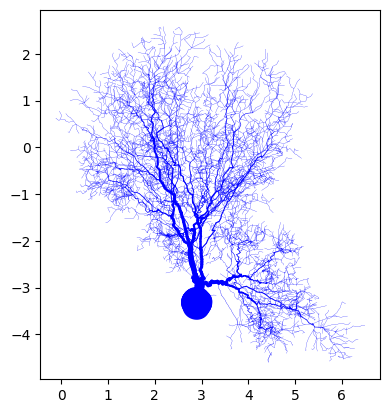

2024.10.14 21:06:00.993 |MainThread   | INFO    | CylinderCollection.py:400 -                 draw() | model - 340 cylinders matched criteria

2024.10.14 21:06:00.999 |MainThread   | INFO    | CylinderCollection.py:335 -    project_cylinders() | model - Projection into XZ axis begun for file 10_MediumCollection.csv

2024.10.14 21:06:42.661 |MainThread   | INFO    | CylinderCollection.py:344 -    project_cylinders() | model - Projection into XZ axis complete for file 10_MediumCollection.csv

2024.10.14 21:06:42.664 |MainThread   | INFO    | geometry.py:563 -            draw_cyls() | model - Plotting cylinder collection

2024.10.14 21:06:42.940 |MainThread   | INFO    | CylinderCollection.py:400 -                 draw() | model - 10400 cylinders matched criteria

2024.10.14 21:06:42.948 |MainThread   | INFO    | geometry.py:563 -            draw_cyls() | model - Plotting cylinder collection

2024.10.14 21:06:46.483 |MainThread   | INFO    | CylinderCollection.py:400 -                 draw() | model - 10450 cylinders matched criteria

2024.10.14 21:06:46.488 |MainThread   | INFO    | geometry.py:563 -            draw_cyls() | model - Plotting cylinder collection

2024.10.14 21:06:50.273 |MainThread   | INFO    | CylinderCollection.py:400 -                 draw() | model - 10450 cylinders matched criteria

2024.10.14 21:06:50.281 |MainThread   | INFO    | geometry.py:563 -            draw_cyls() | model - Plotting cylinder collection

<Axes: >

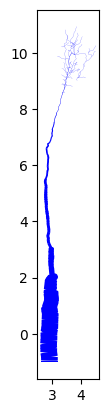

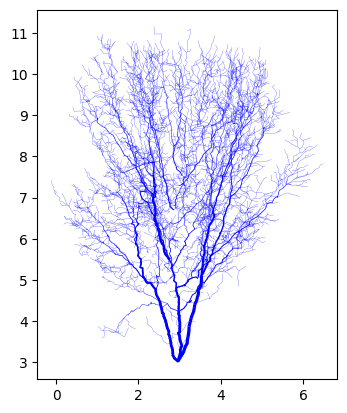

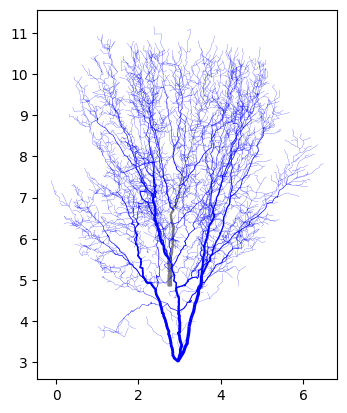

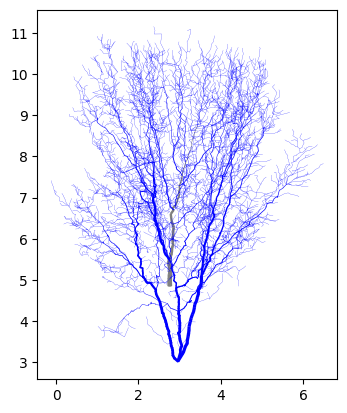

In [2]:
myCollection = CylinderCollection()
# The below file is one of our several testing files, featuring only
# the trunk of a tree and one of its branches
myCollection.from_csv("10_MediumCollection.csv")

# Collections can be drawn without any frills
myCollection.draw("XY", show=True)

# One can also choose to draw only a portion of the collection,
# utilizing 'lambda' functions to define the desired portion of the tree
myCollection.draw("XZ", show=False, filter_lambda=lambda: branch_id < 20)


# Similarly, features of interest can be highlighted in a different color
myCollection.draw("XZ", show=False, filter_lambda=lambda: cyl_id > 100)

myCollection.draw(
    "XZ",
    filter_lambda=lambda: cyl_id > 50,
    highlight_lambda=lambda: branch_order > 0
)  # noqa


myCollection.draw(
    "XZ",
    filter_lambda=lambda: cyl_id > 50,
    highlight_lambda=lambda: cyl_id > 100
)

We recommend sticing to 2D drawings where possible, as this is a lot less computationally intensive than the alternative. However the same '.draw' function can even generate 3D plots of the tree!

2024.10.14 21:07:03.717 |MainThread   | INFO    | CylinderCollection.py:291 -             from_csv() | model - Processing <_io.TextIOWrapper name='./data/input/charlie_brown.csv' mode='r' encoding='UTF-8'>

2024.10.14 21:07:03.753 |MainThread   | INFO    | CylinderCollection.py:320 -             from_csv() | model - ./data/input/charlie_brown.csv initialized with 463 cylinders

2024.10.14 21:07:03.760 |MainThread   | INFO    | CylinderCollection.py:400 -                 draw() | model - 463 cylinders matched criteria

2024.10.14 21:07:03.764 |MainThread   | INFO    | CylinderCollection.py:335 -    project_cylinders() | model - Projection into XZ axis begun for file charlie_brown.csv

2024.10.14 21:07:05.757 |MainThread   | INFO    | CylinderCollection.py:344 -    project_cylinders() | model - Projection into XZ axis complete for file charlie_brown.csv

2024.10.14 21:07:05.762 |MainThread   | INFO    | geometry.py:563 -            draw_cyls() | model - Plotting cylinder collection

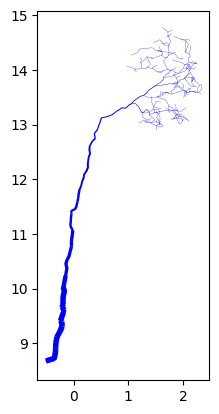

2024.10.14 21:07:06.113 |MainThread   | INFO    | CylinderCollection.py:400 -                 draw() | model - 463 cylinders matched criteria

2024.10.14 21:07:06.117 |MainThread   | INFO    | CylinderCollection.py:335 -    project_cylinders() | model - Projection into XY axis begun for file charlie_brown.csv

2024.10.14 21:07:08.052 |MainThread   | INFO    | CylinderCollection.py:344 -    project_cylinders() | model - Projection into XY axis complete for file charlie_brown.csv

2024.10.14 21:07:08.055 |MainThread   | INFO    | geometry.py:563 -            draw_cyls() | model - Plotting cylinder collection

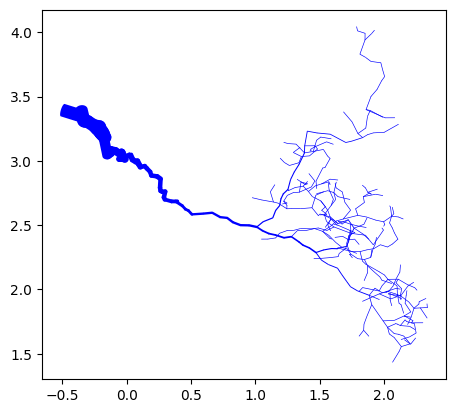

2024.10.14 21:07:08.389 |MainThread   | INFO    | CylinderCollection.py:400 -                 draw() | model - 463 cylinders matched criteria

2024.10.14 21:07:08.394 |MainThread   | INFO    | CylinderCollection.py:335 -    project_cylinders() | model - Projection into YZ axis begun for file charlie_brown.csv

2024.10.14 21:07:10.301 |MainThread   | INFO    | CylinderCollection.py:344 -    project_cylinders() | model - Projection into YZ axis complete for file charlie_brown.csv

2024.10.14 21:07:10.304 |MainThread   | INFO    | geometry.py:563 -            draw_cyls() | model - Plotting cylinder collection

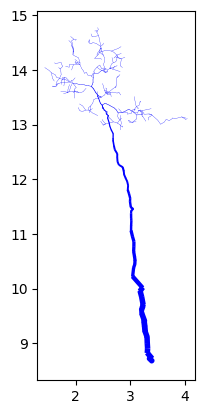

XZ Projection of a collection of cylinders


In [3]:
myCollection = CylinderCollection()
# The below file is one of our several testing files, featuring only
# the trunk of a tree and one of its branches
myCollection.from_csv("charlie_brown.csv")

# by filtering for cyl_id>100, we are only plotting the
# cylinders that are part of the branch
myCollection.draw("XZ", show=True, save=False)
myCollection.draw("XY", show=True, save=False)
myCollection.draw("YZ", show=True, save=False)
# myCollection.draw("3D", show=False, save=False, file_name_ext="2d_3d_comparison")


print("XZ Projection of a collection of cylinders")

To understand how these features support canoPyHydro's titular 'flow identification' functionality, check out [Flow Identification and Drawing](flow_identification_drawing.ipynb)

#

### Forester

Forester objects allow users to conveniently create and manage Cylinder Collections. In particular, Foresters are useful for reading in and processing QSM files.


When a Forester object is created, available file names are read from the default directory, './data/input/'. \
This list of available files can be accessed through the Forester.file_names attribute, as shown below

In [4]:
# Creating a new Forester object
myForester = Forester()
print(
    f"Files available in {myForester.directory}: {list(map(str,myForester.file_names))}"
)

Files available in ./data/input/: ['data/input/Secrest10-08_000000.csv', 'data/input/10_MediumCollection.csv', 'data/input/1_TenCyls.csv', 'data/input/6_LargeTree.csv', 'data/input/charlie_brown.csv', 'data/input/example_tree.csv', 'data/input/minimal_tree.ods', 'data/input/minimal_tree.csv', 'data/input/5_SmallTree.csv']


Optionally, a custom path may be passed to the Forester object, In which case, the Forester will look for files in the passed directory instead

In [5]:
# Passing a custom directory to the Forester object will change the directory attribute
directory = "/data/test/"
myForester = Forester("data/test/")
print(
    f"Files available in {myForester.directory}: {list(map(str,myForester.file_names))}"
)

Files available in data/test/: ['data/test/10_MediumCollection.csv', 'data/test/1_TenCyls.csv', 'data/test/3_HappyPathWTrunk.csv', 'data/test/2_EZ_projection.csv', 'data/test/4_LargeCollection.csv', 'data/test/5_SmallTree.csv', 'data/test/6_LargeTree.csv', 'data/test/8_DripPathMidBranch.csv', 'data/test/7_DripPathAdjToTrunk.csv', 'data/test/9_DripOnTrunk.csv']


The 'qsm_to_collection' function can be used create CylinderCollections from a specified file.

In [13]:
from src.canopyhydro.Forester import Forester
# Importing a QSM file as a CylinderCollection
myForester = Forester("./data/input/")
myForester.qsm_to_collection("example_tree.csv")

cylCollections = myForester.cylinder_collections
firstCollection = cylCollections[0]

print(
    f"Forester has {len(cylCollections)} CylinderCollection, imported from {cylCollections[0].file_name}"
)

2024.10.14 21:09:45.801 |MainThread   | INFO    | CylinderCollection.py:291 -             from_csv() | model - Processing data/input/example_tree.csv
2024.10.14 21:09:46.438 |MainThread   | INFO    | CylinderCollection.py:320 -             from_csv() | model - example_tree.csv initialized with 9998 cylinders


Forester has 1 CylinderCollection, imported from example_tree.csv


If 'All' is provided as the file name, all of the files in the given directory will be read in as CylinderCollections. \
(Note that this may require a significant amount of memory.)

In [23]:
# Reading in all files in the directory as collections
myForester = Forester("./data/test/")
myForester.qsm_to_collection("All")
cylCollections = myForester.cylinder_collections
firstCollection = cylCollections[0]
print(
    f"""Forester created {len(cylCollections)} CylinderCollections, imported from the following files
      {list(map(lambda x: x.file_name,cylCollections))}"""
)

2024.10.14 21:13:20.160 |MainThread   | INFO    | CylinderCollection.py:291 -             from_csv() | model - Processing data/test/10_MediumCollection.csv
2024.10.14 21:13:21.528 |MainThread   | INFO    | CylinderCollection.py:320 -             from_csv() | model - 10_MediumCollection.csv initialized with 10501 cylinders
2024.10.14 21:13:21.530 |MainThread   | INFO    | CylinderCollection.py:291 -             from_csv() | model - Processing data/test/1_TenCyls.csv
2024.10.14 21:13:21.538 |MainThread   | INFO    | CylinderCollection.py:320 -             from_csv() | model - 1_TenCyls.csv initialized with 10 cylinders
2024.10.14 21:13:21.540 |MainThread   | INFO    | CylinderCollection.py:291 -             from_csv() | model - Processing data/test/3_HappyPathWTrunk.csv
2024.10.14 21:13:21.556 |MainThread   | INFO    | CylinderCollection.py:320 -             from_csv() | model - 3_HappyPathWTrunk.csv initialized with 120 cylinders
2024.10.14 21:13:21.558 |MainThread   | INFO    | Cylinde

Forester created 10 CylinderCollections, imported from the following files
      ['10_MediumCollection.csv', '1_TenCyls.csv', '3_HappyPathWTrunk.csv', '2_EZ_projection.csv', '4_LargeCollection.csv', '5_SmallTree.csv', '6_LargeTree.csv', '8_DripPathMidBranch.csv', '7_DripPathAdjToTrunk.csv', '9_DripOnTrunk.csv']


Putting all that we have learned together, you can see that all of the statistics available through canoPyHydro can be generated with the below 10 lines of code

In [ ]:
forest = Forester("data/input/")
forest.get_file_names()
forest.qsm_to_collection(file_name="5_SmallTree.csv")
collection = forest.cylinder_collections[0]
collection.project_cylinders("XY")
collection.initialize_digraph_from(in_flow_grade_lim=-0.16)
collection.find_flow_components()
print("finished_find_flow_components")
collection.calculate_flows()
pickle_collection(collection)